In [157]:
#importing the essential libraries for the data computation and manipulation 
import numpy as np
import pandas as pd
import sklearn 
from matplotlib import pyplot as plt 
from sklearn import tree

In [111]:
#importing the iris data in the variable from the csv file 
iris_data = pd.read_csv(r'/home/jaic/Downloads/Iris.csv')
iris_data.describe()
iris_data.head()

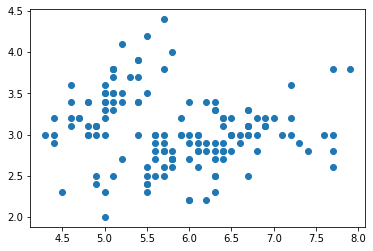

In [112]:
#Visualizing the dataset features to find pattern to solve our task

plt.scatter(iris_data['SepalLengthCm'],iris_data['SepalWidthCm'])
plt.show()

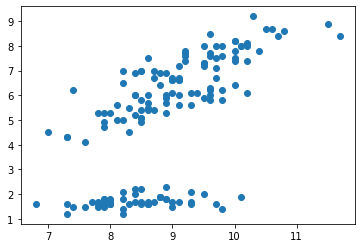

In [203]:
#mining some new features form the given data
iris_data['Sepal_fact'] = iris_data['SepalLengthCm']+iris_data['SepalWidthCm']
iris_data['petal_fact'] = iris_data['PetalLengthCm']+iris_data['PetalWidthCm']
iris_data

plt.scatter(iris_data['Sepal_fact'],iris_data['petal_fact'])
plt.show()

In [204]:
#assigning the target data to the target variable
y=iris_data.Species
#assigning the features into a list 
features = ['Sepal_fact','petal_fact']
#X is the variable which contains the feature
X=iris_data[features]

In [205]:
#importing the libraries for builiding the Decision tree model
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split , cross_val_score

#Splitting the data into training and testing data
Xtrain , Xtest , ytrain , ytest = train_test_split(X,y,test_size=0.3,random_state=30)
#Splitting the data in cross validation training and testing data
Xt , Xcv , yt , ycv = train_test_split(Xtrain ,ytrain ,test_size=0.3,random_state=30)

[Text(133.92000000000002, 195.696, 'X[1] <= 3.25\ngini = 0.653\nsamples = 73\nvalue = [31, 23, 19]'),
 Text(66.96000000000001, 152.208, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(200.88000000000002, 152.208, 'X[1] <= 6.8\ngini = 0.495\nsamples = 42\nvalue = [0, 23, 19]'),
 Text(133.92000000000002, 108.72, 'X[1] <= 6.15\ngini = 0.147\nsamples = 25\nvalue = [0, 23, 2]'),
 Text(66.96000000000001, 65.232, 'gini = 0.0\nsamples = 18\nvalue = [0, 18, 0]'),
 Text(200.88000000000002, 65.232, 'X[0] <= 9.3\ngini = 0.408\nsamples = 7\nvalue = [0, 5, 2]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(267.84000000000003, 21.744, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 17\nvalue = [0, 0, 17]')]

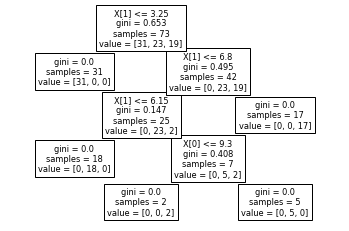

In [206]:
#Builing the DT classifier model by using the training data
Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(Xt,yt)

#Plotting the DT 
tree.plot_tree(Iris_clf)

In [211]:
#cross validation for the training data 
cross_val_score(Iris_clf,Xt,yt,cv=3,scoring='accuracy').mean()

Y_cvt = Iris_clf.predict(Xcv)


print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_cvt)*100)
multilabel_confusion_matrix(Ycv , Y_cvt)

Accuracy score for validation test data is: 96.875


array([[[26,  0],
        [ 0,  6]],

       [[18,  0],
        [ 1, 13]],

       [[19,  1],
        [ 0, 12]]])

[Text(148.8, 195.696, 'X[1] <= 3.3\ngini = 0.664\nsamples = 105\nvalue = [37, 37, 31]'),
 Text(111.60000000000001, 152.208, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(186.0, 152.208, 'X[1] <= 6.45\ngini = 0.496\nsamples = 68\nvalue = [0, 37, 31]'),
 Text(111.60000000000001, 108.72, 'X[0] <= 7.6\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(74.4, 65.232, 'X[0] <= 7.35\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(37.2, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(148.8, 65.232, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(260.40000000000003, 108.72, 'X[1] <= 6.8\ngini = 0.117\nsamples = 32\nvalue = [0, 2, 30]'),
 Text(223.20000000000002, 65.232, 'X[1] <= 6.65\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(186.0, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(260.40000000000003, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'

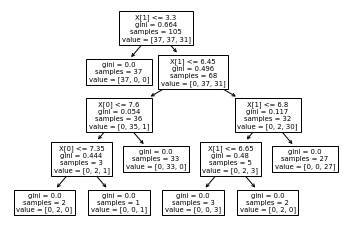

In [208]:
#Checking our model performance on actual unseen test data..
RealIris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=3)
RealIris_clf.fit(Xtrain,ytrain)

#Plotting the tree for the actual unseen data
tree.plot_tree(RealIris_clf)

In [210]:
#Prediction on the test data set.
RealYt_hat= Iris_clf.predict(Xtest)

RealYt_hat

print('The accucracy of the acutal test data set is',accuracy_score(ytest,RealYt_hat)*100)

multilabel_confusion_matrix(ytest,RealYt_hat)


The accucracy of the acutal data set is 95.55555555555556


array([[[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 2, 11]],

       [[24,  2],
        [ 0, 19]]])